In [1]:
#opening and closing

In [25]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
os.getcwd(),os.listdir()


('C:\\Users\\kochallibrhm\\Desktop\\Ders\\Görüntü İşleme\\week_06',
 ['.ipynb_checkpoints', 'letter.png', 'README.MD', 'week6.ipynb'])

In [26]:
def myf0and(l1, l2):
    n = len(l1)
    s = []
    for i in range (n):
        a = (list1[i] and list2[i])
        s.append(a)
    return s

def myf1AND_or_OR(l1, operator = 0):
    if operator:
        if 1 in l1:
            s1 = 1
        else:
            s1 = 0
    else:
        if 0 in l1:
            s1 = 0
        else:
            s1 = 1
    return s1

def myf2Combine(l1, l2, op = 0):
    a = myf0and(l1, l2)
    return myf1AND_or_OR(a, op)

In [27]:
def convert_RGB_to_monochrome_BW(image1, threshold = 100):
    img1 = image1      #plt.imread(image1)
    img2 = np.zeros((img1.shape[0], img1.shape[1]))
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            if(img1[i, j, 0]/3 + img1[i, j, 1]/3 + img1[i, j, 1]/3) > threshold:
                img2[i, j] = 0
            else:
                img2[i, j] = 1
    return img2

In [28]:
list1 = [0, 0, 1, 0, 1]
list2 = [1, 1, 1, 1, 1]
myf2Combine(list1, list2, 1)

1

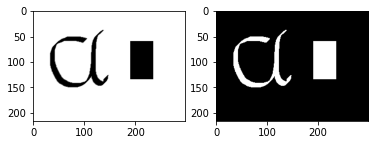

In [33]:
path_file = "C:\\Users\\kochallibrhm\\Desktop\\Ders\\Görüntü İşleme\\week_06\\letter.png"
img1 = plt.imread(path_file)

img2 = convert_RGB_to_monochrome_BW(img1, 0.5)

plt.subplot(1, 2, 1), plt.imshow(img1)
plt.subplot(1, 2, 2), plt.imshow(img2, cmap = 'gray')
plt.show()

In [34]:
img1.shape

(216, 299, 4)

In [35]:
np.max(img1)

1.0

In [36]:
img2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
def defineMask1():
    mask1 = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
    ###  mask, mask[1][2], mask[0][0], mask[2][2]
    ###  for i in range(3):
    ###      for j in range(3):
    ###          print(mask[i][j], end = " ")
    ###      print()
    return mask1


def defineMask2():
    mask1 = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    mask, mask[1][2], mask[0][0], mask[2][2]
    for i in range(3):
        for j in range(3):
            print(mask[i][j], end = " ")
        print()
    return mask1


def myDilation(img1, mask, morphologyOperation = 'dilation'):
    # morphologyOperation = 'dilation' or 'erosion'
    m = img1.shape[0]
    n = img1.shape[1]
    
    img2 = np.random.randint(0, 1, (m, n))
    for i in range(1, m-1):
        for j in range(1, n-1):
            
            x1 = img1[i, j] == mask[1][1]
            
            x2 = img1[i-1, j-1] == mask[0][0]
            x3 = img1[i-1, j] == mask[0][1]
            x4 = img1[i-1, j+1] == mask[0][2]
            
            x5 = img1[i+1, j-1] == mask[2][0]
            x6 = img1[i+1, j] == mask[2][1]
            x7 = img1[i+1, j+1] == mask[2][2]
            
            x8 = img1[i, j-1] == mask[1][0]
            x9 = img1[i, j+1] == mask[1][2]
            
            if(morphologyOperation == 'dilation'):
                result1 = x1 or x2 or x3 or x4 or x5
                result2 = x6 or x7 or x8 or x9
                result = result1 or result2
                
            elif(morphologyOperation == 'erosion'): 
                result1 = x1 and x2 and x3 and x4 and x5
                result2 = x6 and x7 and x8 and x9
                result = result1 and result2
            
            img2[i, j] = result
            
    return img2

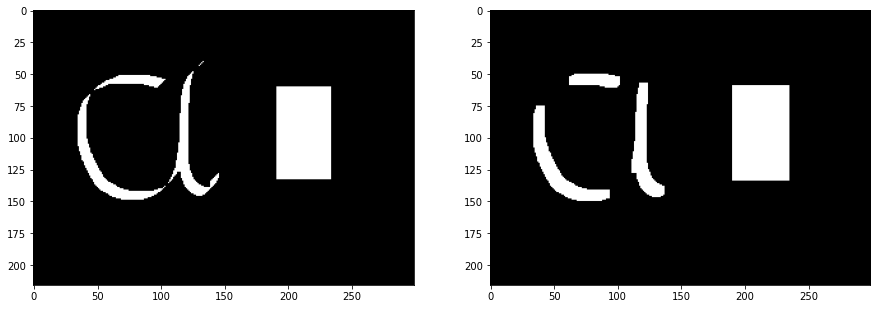

In [42]:
img3 = myDilation(img2, defineMask1(), 'erosion')   #opening operation
img4 = myDilation(img3, defineMask1(), 'erosion') 
img5 = myDilation(img4, defineMask1(), 'erosion')

img6 = myDilation(img5, defineMask1(), 'dilation')
img7 = myDilation(img6, defineMask1(), 'dilation')
img8 = myDilation(img7, defineMask1(), 'dilation')

plt.figure(figsize = (15,15))
plt.subplot(1, 2, 1), plt.imshow(img3, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img8, cmap = 'gray')
plt.show()

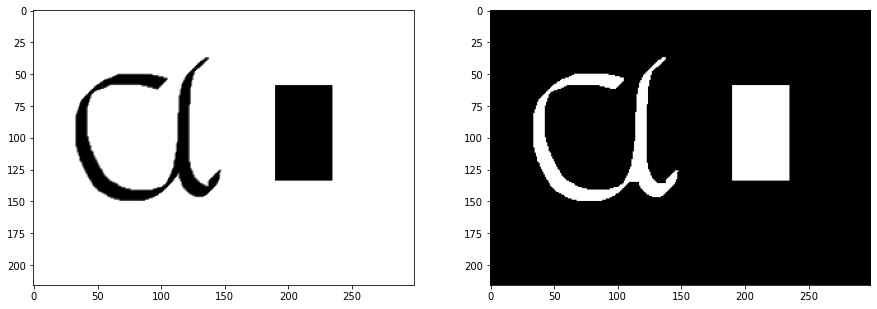

In [44]:
img3 = myDilation(img2, defineMask1(), 'dilation')   #closing operation
img4 = myDilation(img3, defineMask1(), 'dilation') 
img5 = myDilation(img4, defineMask1(), 'dilation')

img6 = myDilation(img5, defineMask1(), 'erosion')
img7 = myDilation(img6, defineMask1(), 'erosion')
img8 = myDilation(img7, defineMask1(), 'erosion')

plt.figure(figsize = (15,15))
plt.subplot(1, 2, 1), plt.imshow(img1, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img8, cmap = 'gray')
plt.show()

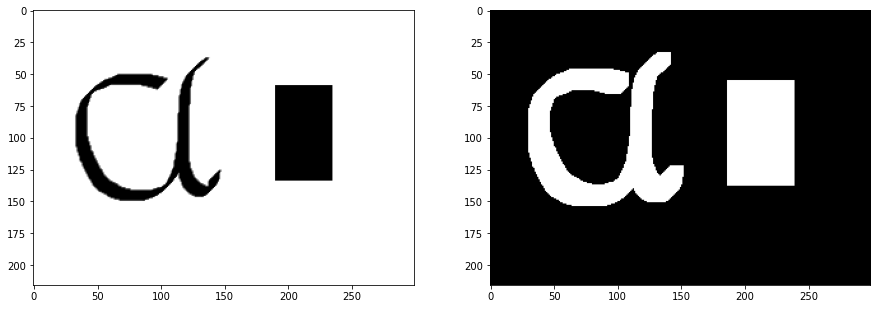

In [48]:
img9 = myDilation(img8, defineMask1(), 'dilation')
img10 = myDilation(img9, defineMask1(), 'dilation') 
img11 = myDilation(img10, defineMask1(), 'dilation')
img12 = myDilation(img11, defineMask1(), 'dilation')



plt.figure(figsize = (15,15))
plt.subplot(1, 2, 1), plt.imshow(img1, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img12, cmap = 'gray')
plt.show()